## EECS 4404 Project 1: Lucas Aguiar - 217127630

### Objective: Predict the class of penguin species using a variety of models, comparing them.

## Read in Data from CSV

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.options.display.max_colwidth = 100
pd.options.mode.chained_assignment = None 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

penguins = pd.read_csv('./penguins_size.csv')
penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## Exploring and Cleaning Data


### Removing Null Values

Upon First Look, we can tell that there are some entries will null data. These entries should be removed.

In [2]:
penguins = penguins.dropna()
penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### Analyzing Data

I'm aiming to analyze the difference between species based on the islands they live on, as well differences in size based on sex and species (as there will be differences between the same species based on their sex),

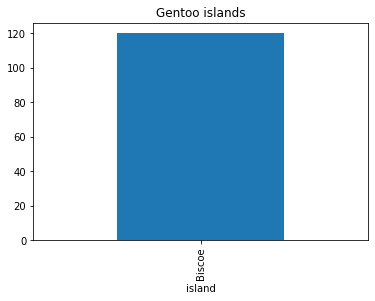

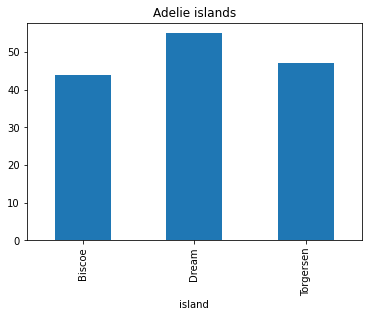

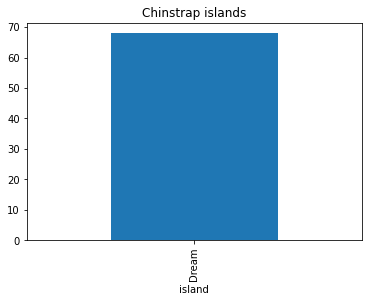

In [3]:
for i in ['Gentoo', 'Adelie', 'Chinstrap']:
    penguins.loc[penguins['species']==i].groupby('island').size().plot(kind='bar')
    plt.title(i + " islands")
    plt.show()

We can see that Gentoo penguins are exclusive to the island Biscoe, and Chinstrap penguins are exclusive to the island Dream, while Adelie penguins are spread out across all 3 islands. However they are the sole penguins on Torgersen. This means that the ML model we built will need to be able to distinguish between Chinstrap and Adelie penguins on Dream, as well as Gentoo and Adelie penguins on Biscoe. 

In [4]:
penguins.groupby(["species", "sex"])["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"].mean()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
species   sex                                                            
Adelie    FEMALE         37.257534        17.621918         187.794521   
          MALE           40.390411        19.072603         192.410959   
Chinstrap FEMALE         46.573529        17.588235         191.735294   
          MALE           51.094118        19.252941         199.911765   
Gentoo    .              44.500000        15.700000         217.000000   
          FEMALE         45.563793        14.237931         212.706897   
          MALE           49.473770        15.718033         221.540984   

                  body_mass_g  
species   sex                  
Adelie    FEMALE  3368.835616  
          MALE    4043.493151  
Chinstrap FEMALE  3527.205882  
          MALE    3938.970588  
Gentoo    .       4875.000000  
          FEMALE  4679.741379  
          MALE    5484.836066

#### Differences between Sex

We can see that, within each species, Males are heavier, and have larger culmen length, depth, and larger flipper length.

#### Weight between Species

While Adelie and Chinstrap penguins are somewhat similar in mass, Gentoo are overall much heavier.

#### Flipper Length between Species

We can see that Adelie have the smallest flipper length, while Gentoo have the largest flipper length. However the difference between a male Gentoo, and a male Adelie is only 30mm, so this is not much of a defining feature.

#### Culmen Depth between Species

We can see that Adelie and Chinstrap penguins have extremely similar culmen depth, while Gentoo have a smaller culmen depth.

#### Culmen Length between Species

We can see that Adelie penguins have the smallest culmen length, while Chinstrap penguins have the largest culmen length, though Gentoo penguins are almost as large. 

#### Plotting these continuous features

Rather than just looking at the averages, since these 4 features are continuous, we want to plot them as well.


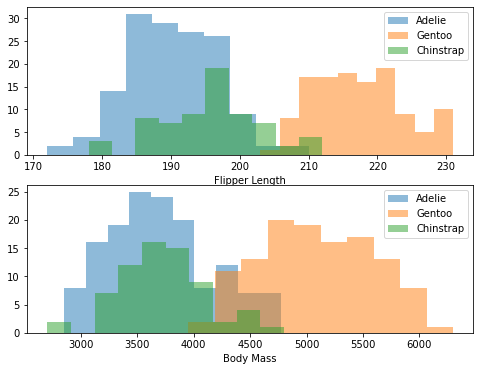

In [5]:
t, sub = plt.subplots(2, figsize = (8,6))
species = list(set(penguins['species']))
for s in species:
    sub[0].hist(penguins[penguins['species']==str(s)]['flipper_length_mm'], alpha = 0.5, label = str(s))
    sub[0].set(xlabel = 'Flipper Length')
    sub[0].legend()
    
    sub[1].hist(penguins[penguins['species']==str(s)]['body_mass_g'], alpha = 0.5, label = str(s))
    sub[1].set(xlabel = 'Body Mass')
    sub[1].legend()

As seen in the plot of flipper length/ body mass graphs, Adelie and Gentoo are fairly distinct from eachother, but there is considerable amounts of overlap between Chinstrap and Adelie, as well as a small amount of overlap between Chinstrap and Gentoo

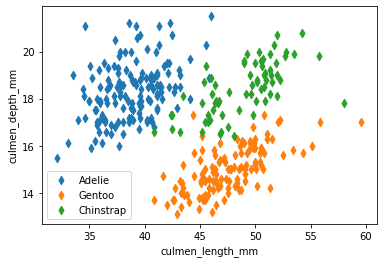

In [6]:
p, sub = plt.subplots(1)
for s in species:
    sub.scatter(penguins[penguins['species']==str(s)]['culmen_length_mm'],
             penguins[penguins['species']==str(s)]['culmen_depth_mm'],
             label = str(s), marker='d')
    sub.set(xlabel='culmen_length_mm', ylabel='culmen_depth_mm')
sub.legend()

The following scatter plot shows that when culmen length and depth are combined, most penguins can be distinguished between eachother. However, there is some slight overlap, where a model may have issues (and wouldn't be able to just rely on these two variables to decide the penguin type.

### Converting Categorical Variables to Integers

Notice how Species, Island and sex are categorical variables? For instance, Sex is either Male or Female, species is one of Adelie, Gentoo or Chinstrap, and island is either dream, torgersen, or biscoe. Meanwhile the other values are continuous variables, otherwise known as a real number.

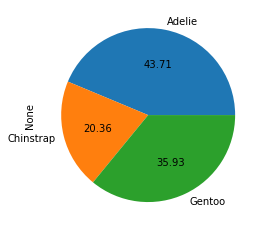

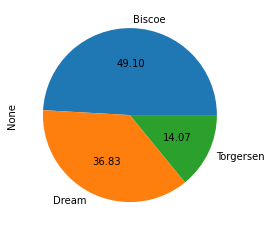

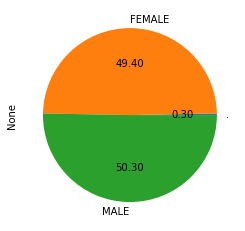

In [7]:
for i in ['species', 'island', 'sex']:
    penguins.groupby(i).size().plot(kind='pie', autopct='%.2f')
    plt.show()

Instead of keeping them as values like MALE or FEMALE, we can just change these values to set integers. 
For example, 0 = MALE and 1 = FEMALE. We can then map these to the initial values. We will do this for the 3 binary variables that were explored above.

We also see that in the pie charts above, there is an entry with a sex of '.'. We will remove that entry for simplicity sake first.

In [8]:
penguins.drop(penguins[penguins['sex'] == '.'].index, inplace=True)

sex_num = {"MALE": 0, "FEMALE": 1}
species_num = {"Gentoo": 0, "Adelie": 1, "Chinstrap": 2}
island_num = {"Dream": 0, "Torgersen": 1, "Biscoe": 2}

penguins['sex'] = penguins['sex'].map(sex_num)
penguins['species'] = penguins['species'].map(species_num)
penguins['island'] = penguins['island'].map(island_num)

penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,1,39.1,18.7,181.0,3750.0,0
1,1,1,39.5,17.4,186.0,3800.0,1
2,1,1,40.3,18.0,195.0,3250.0,1
4,1,1,36.7,19.3,193.0,3450.0,1
5,1,1,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
338,0,2,47.2,13.7,214.0,4925.0,1
340,0,2,46.8,14.3,215.0,4850.0,1
341,0,2,50.4,15.7,222.0,5750.0,0
342,0,2,45.2,14.8,212.0,5200.0,1


## Splitting into Train, Validation and Train datasets

As mentioned in the project specs, we must experiment between 2 different ratios of datasets:

**60-20-20** and **80-10-10**

In [9]:
from sklearn.model_selection import train_test_split

features = penguins.drop('species', axis=1)
labels = penguins['species']

xtrain_60, xtest_60, ytrain_60, ytest_60 = train_test_split(features, labels, test_size=0.4, random_state=42)
xtest_60, xval_60, ytest_60, yval_60 = train_test_split(xtest_60, ytest_60, test_size=0.5, random_state=42)

xtrain_80, xtest_80, ytrain_80, ytest_80 = train_test_split(features, labels, test_size=0.2, random_state=42)
xtest_80, xval_80, ytest_80, yval_80 = train_test_split(xtest_60, ytest_60, test_size=0.5, random_state=42)

#To show they are correct size

for dataset in [ytrain_60, yval_60, ytest_60, ytrain_80, yval_80, ytest_80]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2
0.8
0.1
0.1


# Finding the best model for 60-20-20 split ratio
## Finding Optimal Hyperparameters for Three models
The models I will be using are **SVM (Support Vector Machines)**, **RF (Random Forest)**, and **Boosting**.


We will also define a method print_results that we will use throughout fitting our models to model our results and see which hyperparameters performed the best.

### Support Vector Machines
SVM has 3 hyperparameters: **Kernel**, and **C**

In [10]:
def print_results(results):
    print('Best Parameters are: {}\n'.format(results.best_params_))
    
    frame = pd.DataFrame(
        {
            'Mean':results.cv_results_['mean_test_score'],
            'STD':results.cv_results_['std_test_score'],
            'Params':results.cv_results_['params']
        })
    return frame.sort_values(by='Mean', ascending=False).head(150)

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

bestmodels1 = {}
svc = SVC()
parametersSVC = {
    'kernel': ['linear', 'rbf'],
    'C': [0.01, 0.1, 1, 10]
}

cv = GridSearchCV(svc, parametersSVC, cv=5)
cv.fit(xtrain_60, ytrain_60.values.ravel())
bestmodels1["SVM"] = cv.best_estimator_

print_results(cv)

Best Parameters are: {'C': 0.1, 'kernel': 'linear'}



,Mean,STD,Params
2,0.985000,0.030000,"{'C': 0.1, 'kernel': 'linear'}"
0,0.975000,0.027386,"{'C': 0.01, 'kernel': 'linear'}"
6,0.970000,0.036742,"{'C': 10, 'kernel': 'linear'}"
4,0.965000,0.033912,"{'C': 1, 'kernel': 'linear'}"
5,0.718718,0.047746,"{'C': 1, 'kernel': 'rbf'}"
7,0.718718,0.047746,"{'C': 10, 'kernel': 'rbf'}"
3,0.708846,0.080656,"{'C': 0.1, 'kernel': 'rbf'}"
1,0.407051,0.009814,"{'C': 0.01, 'kernel': 'rbf'}"


### Random Forest

RF has 2 hyperparameters, **n_estimators** and **max_depth**

Although there are a few models that perform the exact same, we will use what is provided by cv.best_estimator_

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
parametersrf = {
    'n_estimators': [5, 50, 100, 250],
    'max_depth': [2, 4, 8, 16, 32, 64, None]
}

cv = GridSearchCV(rf, parametersrf, cv=5)
cv.fit(xtrain_60, ytrain_60.values.ravel())

bestmodels1["RF"] = cv.best_estimator_

print_results(cv)

Best Parameters are: {'max_depth': 32, 'n_estimators': 50}



,Mean,STD,Params
23,1.000000,0.000000,"{'max_depth': 64, 'n_estimators': 250}"
22,1.000000,0.000000,"{'max_depth': 64, 'n_estimators': 100}"
21,1.000000,0.000000,"{'max_depth': 64, 'n_estimators': 50}"
17,1.000000,0.000000,"{'max_depth': 32, 'n_estimators': 50}"
14,0.995000,0.010000,"{'max_depth': 16, 'n_estimators': 100}"
11,0.995000,0.010000,"{'max_depth': 8, 'n_estimators': 250}"
25,0.995000,0.010000,"{'max_depth': None, 'n_estimators': 50}"
19,0.995000,0.010000,"{'max_depth': 32, 'n_estimators': 250}"
18,0.995000,0.010000,"{'max_depth': 32, 'n_estimators': 100}"
15,0.995000,0.010000,"{'max_depth': 16, 'n_estimators': 250}"


### Boosting

Boosting has 3 hyperparameters, **n_estimators**, **max_depth**, and **learning_rate**

Although there are a few models that perform the exact same, we will use what is provided by cv.best_estimator_

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

boost = GradientBoostingClassifier()
parameters_b = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(boost, parameters_b, cv=5)
cv.fit(xtrain_60, ytrain_60.values.ravel())
bestmodels1["B"] = cv.best_estimator_

print_results(cv)

Best Parameters are: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}



,Mean,STD,Params
3,0.985000,0.012247,"{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}"
21,0.985000,0.012247,"{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50}"
26,0.985000,0.012247,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}"
27,0.985000,0.012247,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}"
39,0.980000,0.018708,"{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 500}"
...,...,...,...
61,0.431923,0.178615,"{'learning_rate': 10, 'max_depth': 1, 'n_estimators': 50}"
83,0.396923,0.016967,"{'learning_rate': 100, 'max_depth': 1, 'n_estimators': 500}"
82,0.396923,0.016967,"{'learning_rate': 100, 'max_depth': 1, 'n_estimators': 250}"
81,0.396923,0.016967,"{'learning_rate': 100, 'max_depth': 1, 'n_estimators': 50}"


## Plotting Learning Curves using the tuned hyperparameters

Now that was have the best performing hyperparameters for each algorithm, we will plot the learning curve for each of these three models.

We will also define a function for plotting the learning curve, so that we can reuse it when working with the 80-10-10 split ratio. The function is similar to a function defined at the following reference in the scikit-learn docs: https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

The 3 Models we will be using are:

*SVM w/ C = 0.1 and Kernel = Linear*

*RF w/ max_depth = 32 and n_estimators = 50*

*Boosting w/ max_depth = 1, n_estimators = 500, and learning rate = 0.01*

Due to the random nature of these algorithms, on further runs the chosen models may be different.


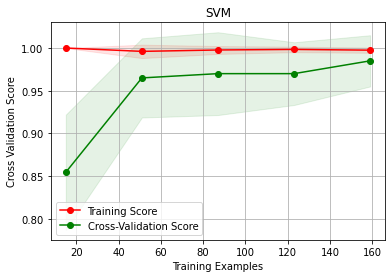

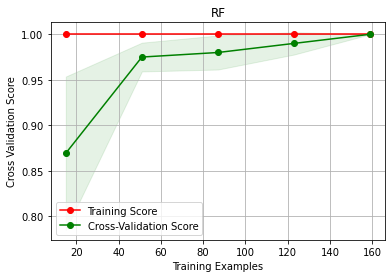

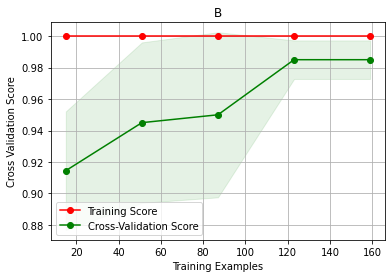

In [14]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(
    estimator, 
    title, 
    X, 
    y,  
    cv=None, 
    train_sizes=np.linspace(0.1,1.0,5),
):
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=None,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Cross Validation Score")
    plt.grid()
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-Validation Score")
    plt.legend(loc="best")
    plt.show()
    
for mdl in ["SVM", "RF", "B"]:
    plot_learning_curve(bestmodels1[mdl], mdl, xtrain_60, ytrain_60, cv=5)

For the most part (other than a slight decrease for SVM), the training score for all models remain 1.0 as training examples increase. The cross validation score however, starts lower and increases to around the same level as the training score for that model (slightly lower) as training examples increase.

## Testing Models on Validation Set

We will test the best estimator from the 3 models on our validation set, and then use the best model from the validation set to test on the test set.

We will also define evaluate_model (a function from the lectures) to do this.

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average="micro"), 3)
    recall = round(recall_score(labels, pred, average="micro"), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [16]:
for name, mdl in bestmodels1.items():
    evaluate_model(name, mdl, xval_60, yval_60)

SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 3.8ms
RF -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 9.4ms
B -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 3.0ms


Although all models performed the same on the validation set, Boosting had the lowest latency, and was therefore the fastest, and we will test it against the test set.

Another interesting observation is that the latency for RF is significantly larger than the other 2 models. This is because, although RF is a reliable model, it should not be used if the prediction time is important. Boosted Trees are quite similar to Random Forests, but are different in the sense that they learn from past mistakes, which does make training time longer, but makes prediction time much faster.

Although SVM performs best when detecting binary target variables, it performs perfectly on the validation set. This is quite interesting, and I believe it can be attributed to the various outliers that overlap between one another as shown above with Culmen length and depth.

## Testing Models on Test Set

In [17]:
evaluate_model("B", bestmodels1["B"], xtest_60, ytest_60)

B -- Accuracy: 0.97 / Precision: 0.97 / Recall: 0.97 / Latency: 5.3ms


Although boosting performed perfectly on the validation set, it had an accuracy, precision and recall of 0.97 on the test set. This could be due to an unavoidable error margin, or due to overfitting. 

It is also interesting to note that the latency was larger on the test set than it was on the validation set.

# Finding the best model for 80-10-10 split ratio
## Finding Optimal Hyperparameters for Three models
The same models and parameters will be tested on as the 60-20-20 split ratio.

### Support Vector Machines

In [18]:
cv = GridSearchCV(svc, parametersSVC, cv=5)
cv.fit(xtrain_80, ytrain_80.values.ravel())

bestmodels2 = {}

bestmodels2["SVM"] = cv.best_estimator_
print_results(cv)

Best Parameters are: {'C': 0.1, 'kernel': 'linear'}



,Mean,STD,Params
2,0.984906,0.022004,"{'C': 0.1, 'kernel': 'linear'}"
6,0.977498,0.013972,"{'C': 10, 'kernel': 'linear'}"
0,0.973725,0.019161,"{'C': 0.01, 'kernel': 'linear'}"
4,0.973585,0.025594,"{'C': 1, 'kernel': 'linear'}"
7,0.725507,0.042664,"{'C': 10, 'kernel': 'rbf'}"
3,0.721733,0.052876,"{'C': 0.1, 'kernel': 'rbf'}"
5,0.721733,0.037039,"{'C': 1, 'kernel': 'rbf'}"
1,0.432355,0.003215,"{'C': 0.01, 'kernel': 'rbf'}"


### Random Forest



In [19]:
cv = GridSearchCV(rf, parametersrf, cv=5)
cv.fit(xtrain_80, ytrain_80.values.ravel())

bestmodels2["RF"] = cv.best_estimator_

print_results(cv)

Best Parameters are: {'max_depth': 32, 'n_estimators': 100}



,Mean,STD,Params
18,0.996296,0.007407,"{'max_depth': 32, 'n_estimators': 100}"
17,0.992523,0.009158,"{'max_depth': 32, 'n_estimators': 50}"
13,0.992523,0.009158,"{'max_depth': 16, 'n_estimators': 50}"
11,0.992523,0.009158,"{'max_depth': 8, 'n_estimators': 250}"
15,0.988749,0.009187,"{'max_depth': 16, 'n_estimators': 250}"
10,0.988749,0.009187,"{'max_depth': 8, 'n_estimators': 100}"
9,0.988749,0.009187,"{'max_depth': 8, 'n_estimators': 50}"
27,0.988749,0.009187,"{'max_depth': None, 'n_estimators': 250}"
25,0.988749,0.009187,"{'max_depth': None, 'n_estimators': 50}"
26,0.988749,0.009187,"{'max_depth': None, 'n_estimators': 100}"


### Boosting

Although there are a few models that perform the exact same, we will use what is provided by cv.best_estimator_

In [20]:
cv = GridSearchCV(boost, parameters_b, cv=5)
cv.fit(xtrain_80, ytrain_80.values.ravel())

bestmodels2["B"] = cv.best_estimator_

print_results(cv)

Best Parameters are: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}



,Mean,STD,Params
42,0.992523,0.009158,"{'learning_rate': 1, 'max_depth': 1, 'n_estimators': 250}"
11,0.992523,0.009158,"{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}"
29,0.992523,0.009158,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}"
43,0.992523,0.009158,"{'learning_rate': 1, 'max_depth': 1, 'n_estimators': 500}"
19,0.992523,0.009158,"{'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 500}"
...,...,...,...
80,0.371978,0.145716,"{'learning_rate': 100, 'max_depth': 1, 'n_estimators': 5}"
83,0.371978,0.145716,"{'learning_rate': 100, 'max_depth': 1, 'n_estimators': 500}"
63,0.296855,0.127808,"{'learning_rate': 10, 'max_depth': 1, 'n_estimators': 500}"
61,0.296855,0.127808,"{'learning_rate': 10, 'max_depth': 1, 'n_estimators': 50}"


## Plotting Learning Curves using the tuned hyperparameters

Now that was have the best performing hyperparameters for each algorithm, we will plot the learning curve for each of these three models.

The 3 Models we will be using are:

*SVM w/ C = 0.1 and Kernel = Linear*

*RF w/ max_depth = 32 and n_estimators = 100*

*Boosting w/ max_depth = 5, n_estimators = 250, and learning rate = 0.01*

Due to the random nature of these algorithms, on further runs the chosen models may be different.

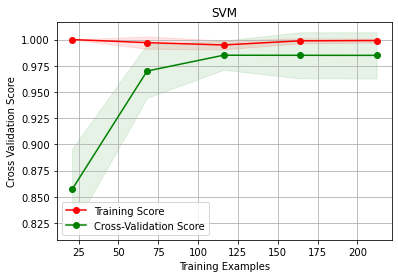

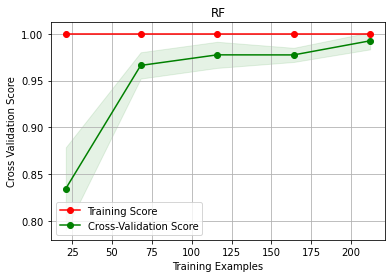

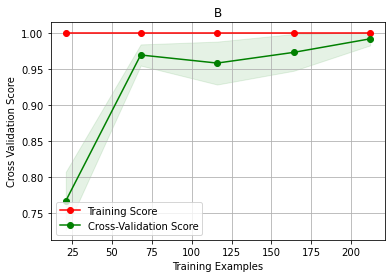

In [21]:
for mdl in ["SVM", "RF", "B"]:
    plot_learning_curve(bestmodels2[mdl], mdl, xtrain_80, ytrain_80, cv=5)

For the most part (other than a slight decrease for SVM), the training score for all models remain 1.0 as training examples increase. The cross validation score however, starts lower and increases to around the same level as the training score for that model (slightly lower) as training examples increase.

There is also a point where the cross validation score decreases for a slight period, before increasing again for Boosted Trees.

Its also interesting to note that these graphs have a greater # of training examples, as we are using an 80-10-10 split ratio now.

## Testing Models on Validation Set

In [22]:
for name, mdl in bestmodels2.items():
    evaluate_model(name, mdl, xval_80, yval_80)

SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.8ms
RF -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 14.6ms
B -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.4ms


Although all models performed the same on the validation set, SVM had the lowest latency, and was therefore the fastest, and we will test it against the test set.

Another interesting observation is that the latency for RF is significantly larger than the other 2 models. This is because, although RF is a reliable model, it should not be used if the prediction time is important. Boosted Trees are quite similar to Random Forests, but are different in the sense that they learn from past mistakes, which does make training time longer, but makes prediction time much faster.

Although SVM performs best when detecting binary target variables, it performs perfectly on the validation set. This is quite interesting, and I believe it can be attributed to the various outliers that overlap between one another as shown above with Culmen length and depth.

## Testing Models on Test Set

In [23]:
evaluate_model("SVM", bestmodels2["SVM"], xtest_80, ytest_80)

SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.4ms


SVM performed perfectly on the test set, just as it had on the validation set. It is also important to note that it did perform slightly worse, with slightly higher latency.

## Which Split Ratio worked the best?

The 80-10-10 split ratio performed better than the 60-20-20, but not by much.

During validation all 3 models performed perfectly, with SVM and Boosting performing almost the same in latency. Boosted was faster for 60-20-20 while SVM was faster for 80-10-10. If I had chosen SVM to be tested on both test ratios, it is possible that they would have performed perfectly for both.

The prediction error that occurred for the first split ratio could have occurred for many reasons. In the class notes, it was explained that there is an irreducible error, so it could have been this. However, if that error was truly irreducible, then it should have occurred for both split ratios. 

A more convincing explanation for this error is that the 60-20-20 model does not give the model enough data to train with, making the model slightly overfit to the smaller set of training data. Since the 80-10-10 model has more data to train with, there is more data that the model can learn from, making the model more balanced.

Another interesting difference I noticed is that there was more models that performed the same during hyperparameter tuning for 60-20-20, and less for 80-10-10 (only boosted had some similarities, while for 60-20-20 there was very similar resutls for both RF and Boosted). I believe this is because of there being more data to train with in the 80-10-10 data split, allowing the models to be different when there are different hyperparameters.  

The learning curve of the models in 80-10-10 was also steeper, and it seemed to learn the trends quicker. 


Overall, I feel like the models would definitely perform better if there was a larger dataset, as it could be used to better train the model. 